<h2 style='text-align:center;font-size:40px;background-color:#3440eb;border:20px;color:white'>BIG MART SALES DATA PREDICTION EDA<h2>

<h2 style='text-align:center;font-size:20px;background-color:#3440eb;border:15px;color:white'>  Importing Import Relevant Libraries <h2>

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder,  OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [57]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import mutual_info_regression , RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [125]:
from BigmartsalesPrediction.app_exception.exception import App_Exception
from BigmartsalesPrediction.app_logger import logging

<h2 style='text-align:center;font-size:30px;background-color:#3440eb;border:20px;color:white'>DATA<h2>



* Item_Identifier : Unique product ID

* Item_Weight : Weight of product

* Item_Fat_Content : Whether the product is low fat or not

* Item_Visibility : The % of total display area of all products in a store allocated to the particular product

* Item_Type : The category to which the product belongs

* Item_MRP : Maximum Retail Price (list price) of the product

* Outlet_Identifier : Unique store ID

* Outlet_Establishment_Year : The year in which store was established

* Outlet_Size : The size of the store in terms of ground area covered

* Outlet_Location_Type : The type of city in which the store is located

* Outlet_Type : Whether the outlet is just a grocery store or some sort of supermarket

* Item_Outlet_Sales : Sales of the product in the particular store.

<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:20px;color:white'>Step 1: Data Inspection <h2>

In [58]:
# loading the data 
sales_data = pd.read_csv('https://raw.githubusercontent.com/pk1308/datasets/master/BigMartSales/Train.csv')
#checking the first 5 rows of the dataframe
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [59]:
# checking the number of data points(different products present in the dataset) & number of features
sales_data.shape

(8523, 12)

we are having 8523 different products with 11 features and target variable is Item_Outlet_Sales.

In [60]:
# getting some information about the dataset
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical Features:

. Item_Identifier : categories of different products

. Item_Fat_Content : It tells us whether it has high fat content or low fat content or regular fat content

. Item_Type : It tells us whether it has meat or soft drink & such kind of things

. Outlet_Identifier : It tells us the unique ID of the outlet

. Outlet_Size : it tells us whether it is medium,high or small in size

. Outlet_Location_Type : It tells us whether it is tier 1 or tier 2 & such kind of things

. Outlet_Type : It tells us whether it is supermarket or grocery store

In [61]:
# checking for missing values
sales_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [62]:
display("Percentage of missing values in each column")
sales_data.isnull().sum()/sales_data.shape[0] *100

'Percentage of missing values in each column'

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

We can observe that we are having 1463 missing values in the Item_Weight column & we are having about 2410 missing values in the Outlet_Size column

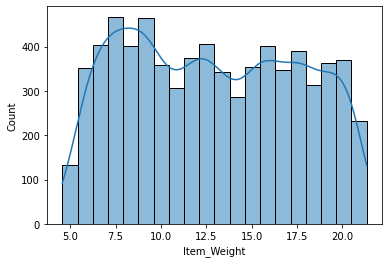

In [63]:
# Item_Weight distribution
#plt.figure(figsize=(5,5))
sns.histplot(sales_data['Item_Weight'], palette='mako' , kde=True , bins=20)
plt.show()

Hence from the above graph we can observe that we have the item weight from 5 Kg to 20 Kg & we have maximum values around 12 Kg where the mean is 12.85 Kg

Therefore in this 8523 products the average weight is about 12.8 Kg

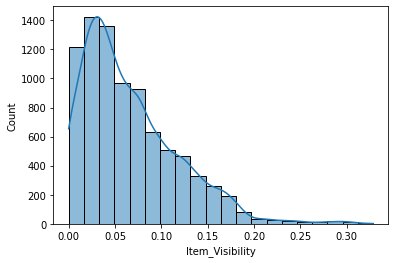

In [64]:
# Item Visibility distribution
#plt.figure(figsize=(5,5))
sns.histplot(sales_data['Item_Visibility'], palette='mako' , kde=True , bins=20)
plt.show()

Hence from the above graph we can observe that Item_Visibility feature is positively skewed

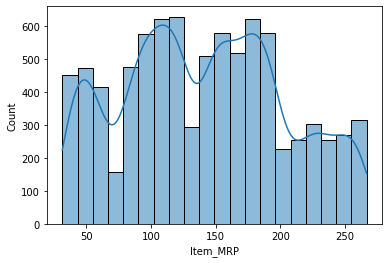

In [65]:
# Item MRP distribution
#plt.figure(figsize=(5,5))
sns.histplot(sales_data['Item_MRP'], palette='mako' , kde=True , bins=20)
plt.show()

From the above graph, we can observe that we have good amount of products for 50 MRP, 100 MRP ,200 MRP & then we have less products

Hence we have more products in the range of 100 MRP - 180 MRP

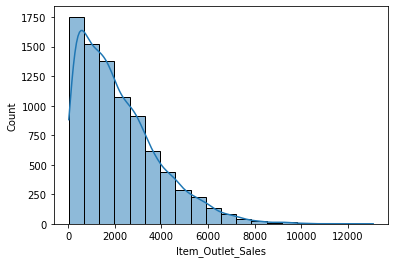

In [66]:
sns.histplot(sales_data['Item_Outlet_Sales'], palette='mako' , kde=True , bins=20)
plt.show()

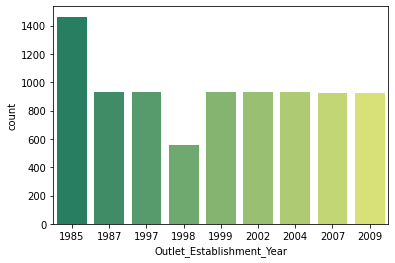

In [67]:
sns.countplot(x='Outlet_Establishment_Year', data=sales_data , palette='summer')
plt.show()

we have the outlet establishment from the year 1985, 1987 and all the way to 2009

Therefore these are the years on which different outlets or different stores have been established

We can also observe that a lots of stores are established in the year 1985 & less in the year 1998 & all the others years are almost same

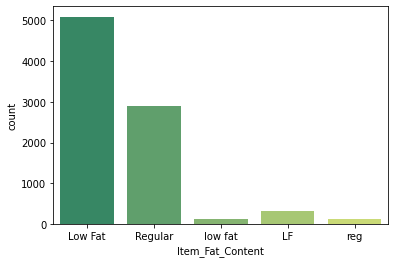

In [68]:
# Item_Fat_Content column
#plt.figure(figsize=(5,5))
sns.countplot(x='Item_Fat_Content', data=sales_data , palette='summer')
plt.show()

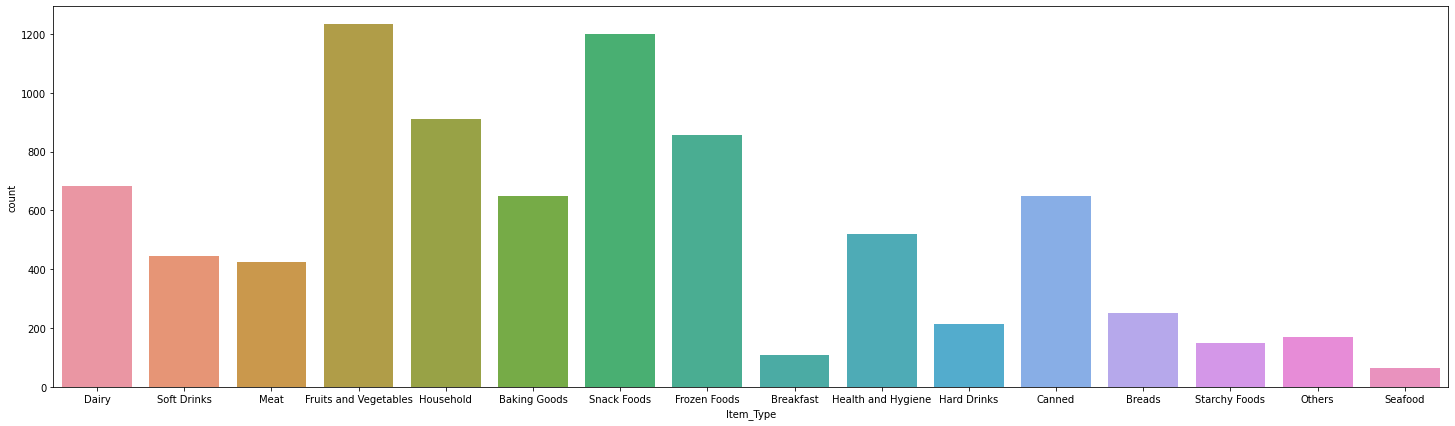

In [69]:
# Item_Type column
plt.figure(figsize=(25,7))
sns.countplot(x='Item_Type', data=sales_data)
plt.show()

Hence totally we have about 16 Item_Type values in this case where we have more values in the fruits & vegetables column and snack foods column

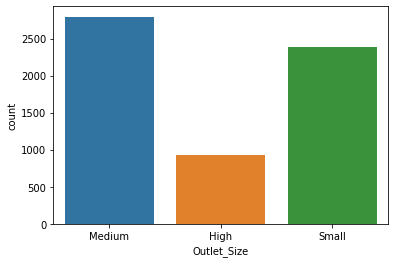

In [70]:
# Outlet_Size column
#plt.figure(figsize=(5,5))
sns.countplot(x='Outlet_Size', data=sales_data)
plt.show()

From the above graph, we can observe that we have three outlet_Size in this case which is medium, small & high

In [71]:
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:20px;color:white'>Step 2. Data Cleaning <h2>

In [72]:
sales_data["Item_Identifier"].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [73]:
sales_data.groupby(['Item_Type',"Item_Identifier"]).count()

Item_Weight  Item_Fat_Content  Item_Visibility  \
Item_Type     Item_Identifier                                                   
Baking Goods  FDA11                      4                 5                5   
              FDA23                      5                 6                6   
              FDA35                      3                 4                4   
              FDA36                      2                 4                4   
              FDA47                      5                 6                6   
...                                    ...               ...              ...   
Starchy Foods FDG59                      5                 6                6   
              FDH35                      5                 6                6   
              FDH47                      6                 6                6   
              FDI35                      3                 3                3   
              FDZ34                      3                 3                3   

                               Item_MRP  Outlet_Identifier  \
Item_Type     Item_Identifier                                
Baking Goods  FDA11                   5                  5   
              FDA23                   6                  6   
              FDA35                   4                  4   
              FDA36                   4                  4   
              FDA47                   6                  6   
...                                 ...                ...   
Starchy Foods FDG59                   6                  6   
              FDH35                   6                  6   
              FDH47                   6                  6   
              FDI35                   3                  3   
              FDZ34                   3                  3   

                               Outlet_Establishment_Year  Outlet_Size  \
Item_Type     Item_Identifier                                           
Baking Goods  FDA11                                    5            3   
              FDA23                                    6            5   
              FDA35                                    4            3   
              FDA36                                    4            3   
              FDA47                                    6            4   
...                                                  ...          ...   
Starchy Foods FDG59                                    6            4   
              FDH35                                    6            3   
              FDH47                                    6            4   
              FDI35                                    3            3   
              FDZ34                                    3            3   

                               Outlet_Location_Type  Outlet_Type  \
Item_Type     Item_Identifier                                      
Baking Goods  FDA11                               5            5   
              FDA23                               6            6   
              FDA35                               4            4   
              FDA36                               4            4   
              FDA47                               6            6   
...                                             ...          ...   
Starchy Foods FDG59                               6            6   
              FDH35                               6            6   
              FDH47                               6            6   
              FDI35                               3            3   
              FDZ34                               3            3   

                               Item_Outlet_Sales  
Item_Type     Item_Identifier                     
Baking Goods  FDA11                            5  
              FDA23                            6  
              FDA35                            4  
              FDA36                            4  
              FDA47          

There is a 1559 unique items in the Item_Identifier  we will map it into three categories :
    "FD" : "Food" , "DR" : "Drink" , "NC" : "Non_consumable"

In [74]:
sales_data["Item_Identifier"] = sales_data["Item_Identifier"].apply(lambda x:x[0:2]).map({"FD" : "Food" , "DR" : "Drink" , "NC" : "Non_consumable"})

In [75]:
sales_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

we will map Item_Fat_Content to "Low Fat" , "Regular" -- 
"Low Fat" : 'Low Fat' , "LF" : "Low Fat" , 'low fat' : "Low Fat" , "Regular" : "Regular" , "reg" : "Regular" 

In [76]:
sales_data['Item_Fat_Content'] = sales_data['Item_Fat_Content'].map({"Low Fat" : 'Low Fat' , "LF" : "Low Fat" , 'low fat' : "Low Fat" , "Regular" : "Regular" , "reg" : "Regular" })

In [77]:
sales_data['Item_Visibility'].value_counts(sort=True , ascending=False)

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [78]:
sales_data[sales_data['Item_Visibility'] == 0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,Food,19.200,Regular,0.0,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,Non_consumable,8.930,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,Food,10.395,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
10,Food,11.800,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
32,Food,18.700,Low Fat,0.0,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064
...,...,...,...,...,...,...,...,...,...,...,...,...
8480,Food,NaN,Low Fat,0.0,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020
8484,Drink,6.865,Low Fat,0.0,Soft Drinks,129.9652,OUT013,1987,High,Tier 3,Supermarket Type1,2324.9736
8486,Food,20.000,Regular,0.0,Fruits and Vegetables,46.4744,OUT010,1998,NaN,Tier 3,Grocery Store,45.2744
8494,Non_consumable,15.200,Low Fat,0.0,Household,110.4912,OUT017,2007,NaN,Tier 2,Supermarket Type1,1637.8680


we will assume that the Item_Visibility value of 0 is the lowest value - may be product are not in display

In [79]:
sales_data["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [80]:
sales_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

we will impute the numerical values 

In [81]:
numerical_features = sales_data.select_dtypes(include=['int64', 'float64']).columns.to_list()
categorical_features = sales_data.select_dtypes(include=['object']).columns.to_list()

In [82]:
numerical_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

create a indicator variable for Item_weight null values 

In [83]:
sales_data['Item_Weight_indicator'] = sales_data['Item_Weight'].isna()

create a indicator variable for outlet-size null values

In [84]:
sales_data['Outlet_Size_indicator']= sales_data['Outlet_Size'].isna()

removing the target column from the features

In [85]:
numerical_features.remove('Item_Outlet_Sales')

In [86]:
sales_data[numerical_features] = numerical_imputer.fit_transform(sales_data[numerical_features])

In [87]:
sales_data[categorical_features] = categorical_imputer.fit_transform(sales_data[categorical_features])

In [88]:
sales_data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Weight_indicator        0
Outlet_Size_indicator        0
dtype: int64

In [89]:
sales_data[sales_data['Item_Weight_indicator']== True]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_indicator,Outlet_Size_indicator
7,Food,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985.0,Medium,Tier 3,Supermarket Type3,4022.7636,True,False
18,Drink,12.857645,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985.0,Medium,Tier 3,Supermarket Type3,2303.6680,True,False
21,Food,12.857645,Regular,0.035400,Baking Goods,144.5444,OUT027,1985.0,Medium,Tier 3,Supermarket Type3,4064.0432,True,False
23,Food,12.857645,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985.0,Small,Tier 1,Grocery Store,214.3876,True,False
29,Food,12.857645,Regular,0.072222,Canned,43.6454,OUT019,1985.0,Small,Tier 1,Grocery Store,125.8362,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8485,Drink,12.857645,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985.0,Medium,Tier 3,Supermarket Type3,6261.8490,True,False
8487,Drink,12.857645,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985.0,Medium,Tier 3,Supermarket Type3,4111.3150,True,False
8488,Non_consumable,12.857645,Low Fat,0.091473,Others,184.6608,OUT027,1985.0,Medium,Tier 3,Supermarket Type3,2756.4120,True,False
8490,Food,12.857645,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985.0,Small,Tier 1,Grocery Store,487.3656,True,False


In [90]:
sales_data['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [91]:
sales_data[sales_data['Outlet_Size_indicator']== True]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_indicator,Outlet_Size_indicator
3,Food,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998.0,Medium,Tier 3,Grocery Store,732.3800,False,True
8,Food,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002.0,Medium,Tier 2,Supermarket Type1,1076.5986,False,True
9,Food,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007.0,Medium,Tier 2,Supermarket Type1,4710.5350,False,True
25,Non_consumable,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007.0,Medium,Tier 2,Supermarket Type1,838.9080,False,True
28,Food,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998.0,Medium,Tier 3,Grocery Store,178.4344,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8502,Non_consumable,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002.0,Medium,Tier 2,Supermarket Type1,3020.0688,False,True
8508,Food,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002.0,Medium,Tier 2,Supermarket Type1,2587.9646,False,True
8509,Food,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998.0,Medium,Tier 3,Grocery Store,424.7804,False,True
8514,Food,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002.0,Medium,Tier 2,Supermarket Type1,468.7232,False,True


<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:20px;color:white'>Step 3. EDA <h2>

In [92]:
sales_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_indicator,Outlet_Size_indicator
0,Food,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,3735.1380,False,False
1,Drink,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,443.4228,False,False
2,Food,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,2097.2700,False,False
3,Food,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998.0,Medium,Tier 3,Grocery Store,732.3800,False,True
4,Non_consumable,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987.0,High,Tier 3,Supermarket Type1,994.7052,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,Food,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987.0,High,Tier 3,Supermarket Type1,2778.3834,False,False
8519,Food,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002.0,Medium,Tier 2,Supermarket Type1,549.2850,False,True
8520,Non_consumable,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004.0,Small,Tier 2,Supermarket Type1,1193.1136,False,False
8521,Food,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,1845.5976,False,False


In [93]:
categorical_features

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [94]:
sales_data["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

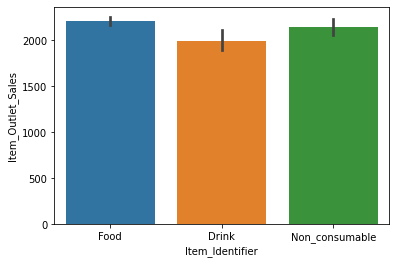

In [95]:
sns.barplot(x='Item_Identifier', y='Item_Outlet_Sales', data=sales_data)
plt.show()

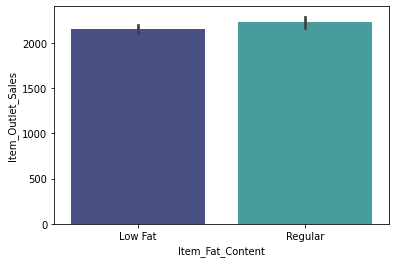

In [96]:
sns.barplot(x = 'Item_Fat_Content',y = 'Item_Outlet_Sales',data=sales_data,palette='mako')
plt.show()

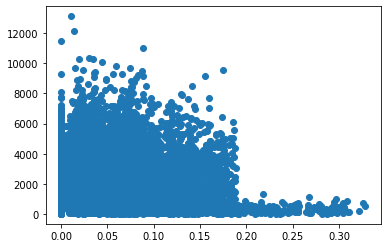

In [97]:
plt.scatter(x = 'Item_Visibility',y = 'Item_Outlet_Sales',data=sales_data)
plt.show()

Item_Visibility has a minimum value of zero. This makes sense because when a product has high demand products are not essentially displayed.

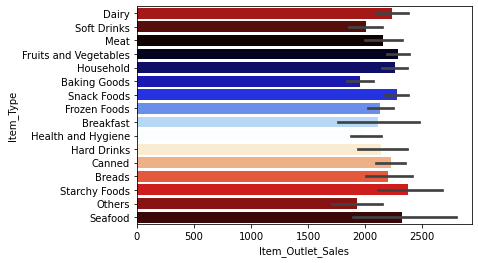

In [98]:
sns.barplot(y='Item_Type',x='Item_Outlet_Sales',data=sales_data,palette='flag')
plt.show()

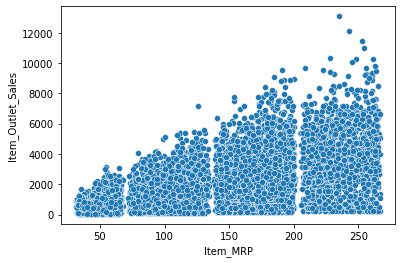

In [99]:
sns.scatterplot(y='Item_Outlet_Sales',x='Item_MRP',data=sales_data)
plt.show()

Items MRP ranging from 200-250 dollars is having high Sales.

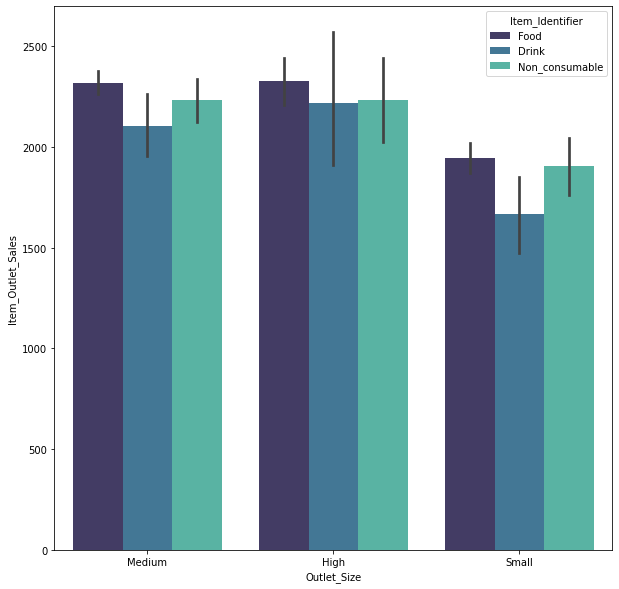

In [100]:
plt.figure(figsize=(10,10))
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=sales_data, hue='Item_Identifier',palette='mako')
plt.show()

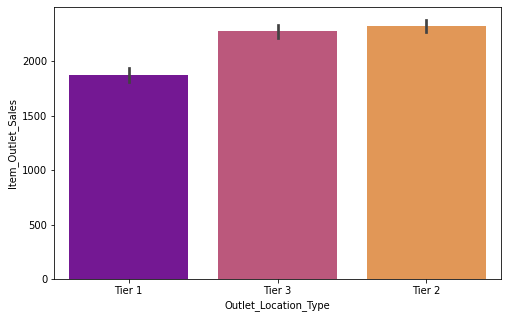

In [101]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=sales_data,palette='plasma')
plt.show()

The Outlet Sales tend to be high for Tier3 and Tier 2 location types but we have only Tier3 locations maximum Outlets.

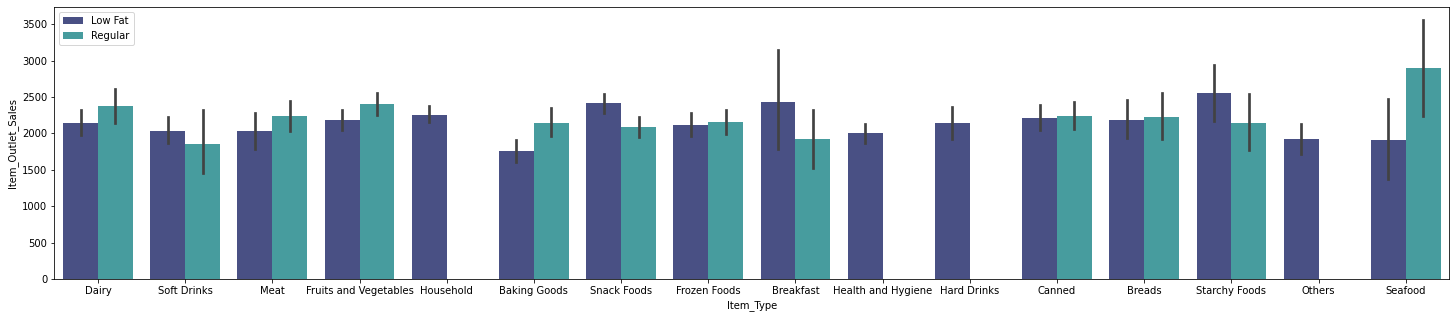

In [102]:
plt.figure(figsize=(25,5))
sns.barplot(x = 'Item_Type', y = 'Item_Outlet_Sales',hue='Item_Fat_Content',data=sales_data,palette='mako')
plt.legend()

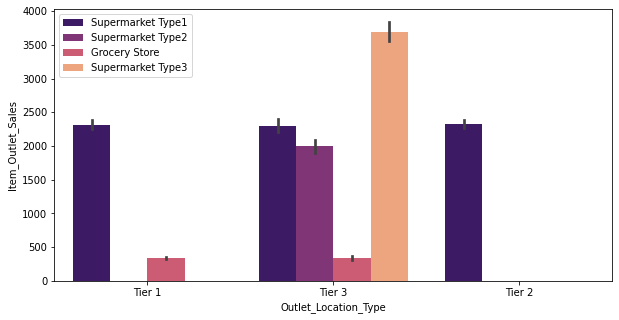

In [103]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'Outlet_Location_Type',y='Item_Outlet_Sales',hue='Outlet_Type',data=sales_data,palette='magma')
plt.legend()

The Tier-3 location type has all types of Outlet type and has high sales margin

<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:20px;color:white'>Step 4. Feature Engineering <h2>

In [104]:
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_indicator,Outlet_Size_indicator
0,Food,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,3735.1380,False,False
1,Drink,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,443.4228,False,False
2,Food,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,2097.2700,False,False
3,Food,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998.0,Medium,Tier 3,Grocery Store,732.3800,False,True
4,Non_consumable,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987.0,High,Tier 3,Supermarket Type1,994.7052,False,False


In [105]:
categorical_features = sales_data.select_dtypes(include=['object' , 'bool']).columns.to_list()
numerical_features = sales_data.select_dtypes(include=['int64', 'float64']).columns.to_list()

In [106]:
label = LabelEncoder()

In [107]:
sales_data[categorical_features] = sales_data[categorical_features].apply(lambda x: label.fit_transform(x))

In [108]:
corr = sales_data.corr()

<AxesSubplot:>

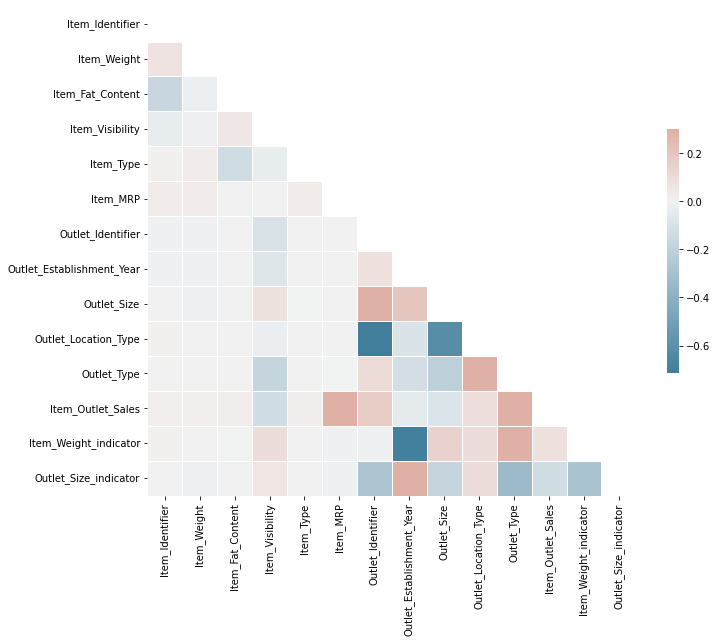

In [109]:
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5} )

In [112]:
df = pd.read_csv('https://raw.githubusercontent.com/pk1308/datasets/master/BigMartSales/Train.csv' )

In [113]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [114]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [115]:
df["Item_Identifier"] = df["Item_Identifier"].apply(lambda x:x[0:2]).map({"FD" : "Food" , "DR" : "Drink" , "NC" : "Non_consumable"})

In [116]:
df["Item_Fat_Content"] = df['Item_Fat_Content'].map({"Low Fat" : 'Low Fat' , "LF" : "Low Fat" , 'low fat' : "Low Fat" , "Regular" : "Regular" , "reg" : "Regular" })

In [117]:
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [118]:
df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [119]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

<AxesSubplot:xlabel='Outlet_Establishment_Year,Outlet_Type'>

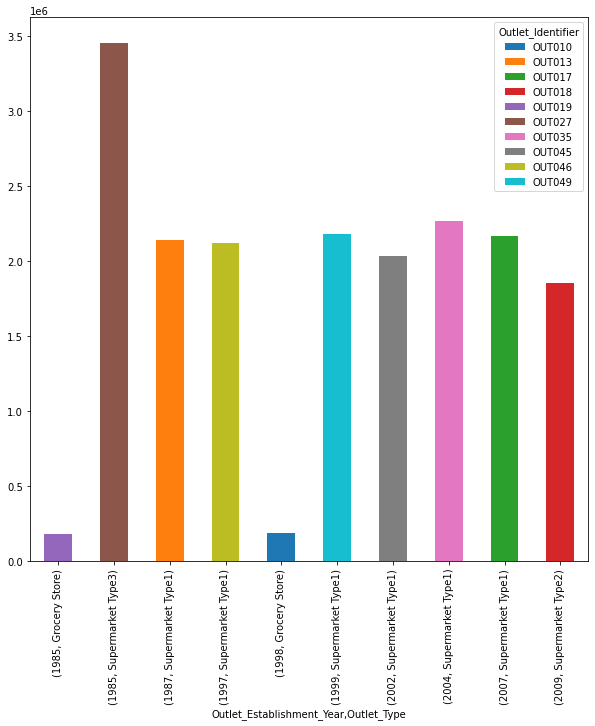

In [120]:
df.groupby(['Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Type'])["Item_Outlet_Sales"].sum().unstack(level=0).plot(kind='bar', stacked=True, figsize=(10,10))

<AxesSubplot:xlabel='Outlet_Establishment_Year,Outlet_Type'>

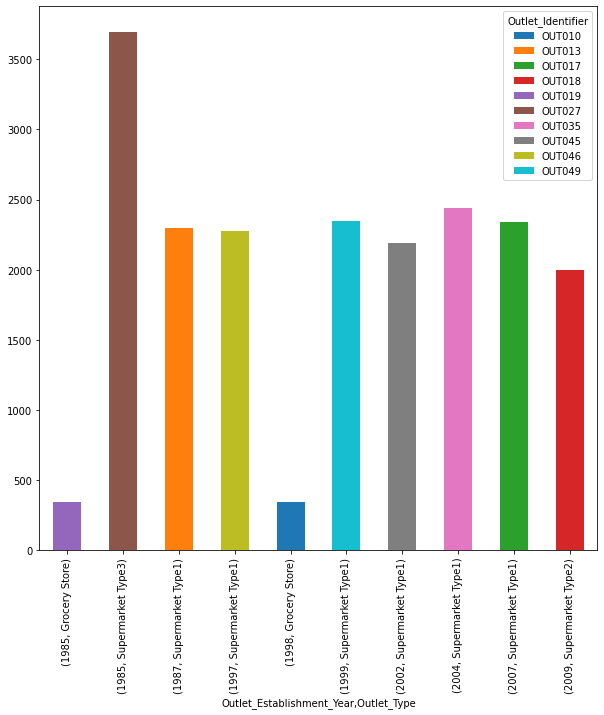

In [121]:
df.groupby(['Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Type'])["Item_Outlet_Sales"].mean().unstack(level=0).plot(kind='bar', stacked=True, figsize=(10,10))

In [126]:
class FeatureGenerator(BaseEstimator, TransformerMixin):

    def __init__(self, current_year=2022):
        try:
            self.current_year = current_year
            if self.current_year is None:
                raise App_Exception("Year cannot be None")

        except Exception as e:
            raise App_Exception(e, sys) from e

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        try:
            logging.info("Transforming data")
            logging.info(f"{X.columns}")
            X["Outlet_Establishment_Year"] = self.current_year - X["Outlet_Establishment_Year"]
            generated_feature = X.copy()

            return generated_feature
        except Exception as e:
            raise App_Exception(e, sys) from e

In [131]:
def feature_select(X, y):
        numerical_columns = X.select_dtypes(exclude=['object' , 'bool']).columns.to_list()
        categorical_columns = X.select_dtypes(include=['object' , 'bool']).columns.to_list()

        num_pipeline = Pipeline(steps=[('feature_generator', FeatureGenerator()),
                                ('imputer', SimpleImputer(strategy="median")),
                                ('scaler', StandardScaler())
                                ]
                        )

        cat_pipeline = Pipeline(steps=[
        ('impute', SimpleImputer(strategy="most_frequent")),
        ('ordinal_encoder', OrdinalEncoder()),
        ('scaler', StandardScaler(with_mean=False))
        ]
        )

        logging.info(f"Categorical columns: {categorical_columns}")
        logging.info(f"Numerical columns: {numerical_columns}")

        preprocessing = ColumnTransformer([
        ('num_pipeline', num_pipeline, numerical_columns),
        ('cat_pipeline', cat_pipeline, categorical_columns),
        ])
        final_arr = preprocessing.fit_transform(X)
        final_df = pd.DataFrame(final_arr, columns=numerical_columns+categorical_columns)
        vif = pd.DataFrame()
        vif["features"] = final_df.columns
        vif["VIF Factor"] = [variance_inflation_factor(final_arr, i) for i in range(final_arr.shape[1])]
        response = vif.sort_values(by="VIF Factor", ascending=False)
        final_df['Target'] = y
        corr = final_df.corr()
        plt.figure(figsize=(12, 8))
        mask = np.triu(np.ones_like(corr, dtype=bool))
        sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5} )
        features = final_df.drop(['Target'],axis=1)
        target = final_df['Target']
        lasso_selected=Lasso(alpha=0.1,max_iter=10000)
        lasso_selected.fit(features,target)
        lasso_selected_features=pd.DataFrame(lasso_selected.coef_,columns=["lasso_selected"] , index=features.columns)

        mutual_info=mutual_info_regression(features,target)
        mutual_data=pd.DataFrame(mutual_info,index=features.columns , columns=["Score_mutual_info"])
        
        clf1 = RandomForestRegressor(random_state=42)
        selector = RFE(estimator = clf1, n_features_to_select=len(features.columns)-2, step=1)
        selector = selector.fit(features, target)
        rfa_selected = pd.DataFrame(selector.ranking_ , columns=["Score_RFE"] , index=features.columns)
        response_df = pd.concat([lasso_selected_features,mutual_data,rfa_selected],axis=1) 
        display(response_df.sort_values(by="Score_RFE",ascending=False))
        display(response)
        return True

In [132]:
X = df.drop(['Item_Outlet_Sales'],axis=1)
y = df['Item_Outlet_Sales']

2022-07-22 15:00:16.803 | INFO     | __main__:feature_select:18 - Categorical columns: ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
2022-07-22 15:00:16.804 | INFO     | __main__:feature_select:19 - Numerical columns: ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
2022-07-22 15:00:16.806 | INFO     | __main__:transform:17 - Transforming data
2022-07-22 15:00:16.807 | INFO     | __main__:transform:18 - Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')


,lasso_selected,Score_mutual_info,Score_RFE
Outlet_Location_Type,-180.041809,0.041963,3
Outlet_Size,-203.184355,0.008316,2
Item_Weight,-0.927262,0.072603,1
Item_Visibility,-72.035783,0.084112,1
Item_MRP,970.669719,0.763477,1
Outlet_Establishment_Year,-1.183281,0.158215,1
Item_Identifier,-8.586012,0.026334,1
Item_Fat_Content,25.318215,0.022377,1
Item_Type,-3.671123,0.056937,1
Outlet_Identifier,169.833748,0.252944,1


,features,VIF Factor
7,Outlet_Identifier,8.965181
10,Outlet_Type,7.271445
9,Outlet_Location_Type,6.964637
8,Outlet_Size,6.150549
4,Item_Identifier,4.907845
6,Item_Type,3.714648
5,Item_Fat_Content,1.553458
1,Item_Visibility,1.064935
3,Outlet_Establishment_Year,1.061445
0,Item_Weight,1.005518


True

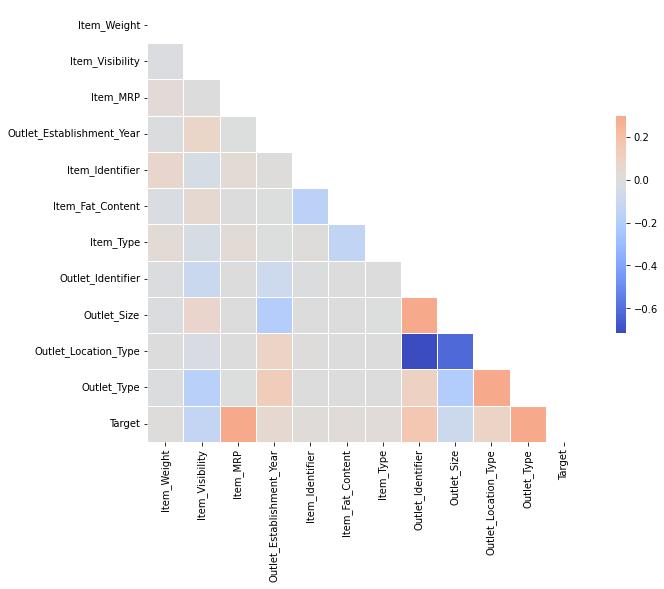

In [133]:
feature_select(X,y)

In [135]:
X.drop(['Outlet_Location_Type'],axis=1 , inplace=True)

2022-07-22 15:02:26.646 | INFO     | __main__:feature_select:18 - Categorical columns: ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Type']
2022-07-22 15:02:26.647 | INFO     | __main__:feature_select:19 - Numerical columns: ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
2022-07-22 15:02:26.649 | INFO     | __main__:transform:17 - Transforming data
2022-07-22 15:02:26.649 | INFO     | __main__:transform:18 - Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')


,lasso_selected,Score_mutual_info,Score_RFE
Outlet_Size,-170.425809,0.006508,3
Item_Fat_Content,25.786572,0.023340,2
Item_Weight,-0.800525,0.074342,1
Item_Visibility,-73.679428,0.084212,1
Item_MRP,969.905391,0.763075,1
Outlet_Establishment_Year,9.845220,0.160092,1
Item_Identifier,-8.710551,0.022502,1
Item_Type,-4.004471,0.053774,1
Outlet_Identifier,292.079058,0.255471,1
Outlet_Type,609.436561,0.272361,1


,features,VIF Factor
8,Outlet_Size,6.103302
7,Outlet_Identifier,5.402960
4,Item_Identifier,3.942564
6,Item_Type,3.237351
9,Outlet_Type,3.056793
5,Item_Fat_Content,1.461346
1,Item_Visibility,1.060088
3,Outlet_Establishment_Year,1.057331
0,Item_Weight,1.005020
2,Item_MRP,1.001629


True

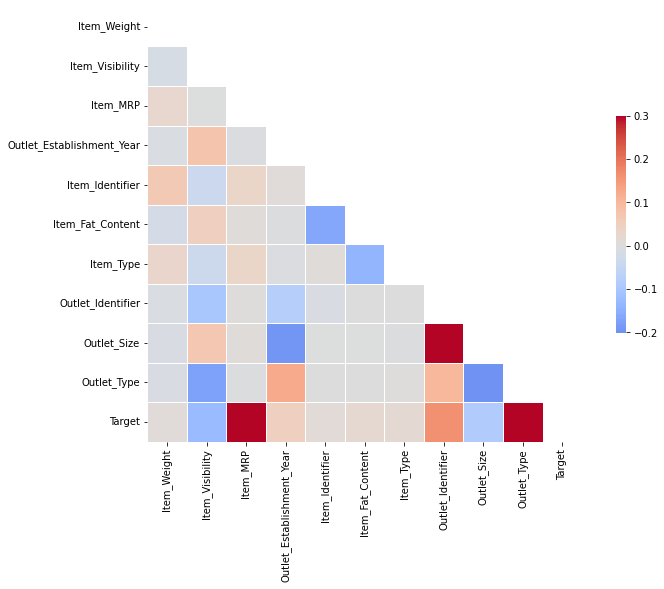

In [136]:
feature_select(X,y)

In [137]:
X.drop(['Outlet_Size'],axis=1 , inplace=True)

2022-07-22 15:04:49.628 | INFO     | __main__:feature_select:18 - Categorical columns: ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type']
2022-07-22 15:04:49.629 | INFO     | __main__:feature_select:19 - Numerical columns: ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
2022-07-22 15:04:49.631 | INFO     | __main__:transform:17 - Transforming data
2022-07-22 15:04:49.632 | INFO     | __main__:transform:18 - Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')


,lasso_selected,Score_mutual_info,Score_RFE
Item_Fat_Content,26.478416,0.020632,3
Item_Identifier,-10.265199,0.028026,2
Item_Weight,0.557876,0.071907,1
Item_Visibility,-89.700888,0.084704,1
Item_MRP,969.349548,0.763283,1
Outlet_Establishment_Year,32.328280,0.157737,1
Item_Type,-4.019362,0.055767,1
Outlet_Identifier,202.473123,0.255464,1
Outlet_Type,647.207394,0.269416,1


,features,VIF Factor
4,Item_Identifier,3.587718
7,Outlet_Identifier,3.236265
6,Item_Type,3.079997
8,Outlet_Type,3.024285
5,Item_Fat_Content,1.431871
1,Item_Visibility,1.034924
3,Outlet_Establishment_Year,1.032126
0,Item_Weight,1.004414
2,Item_MRP,1.001495


True

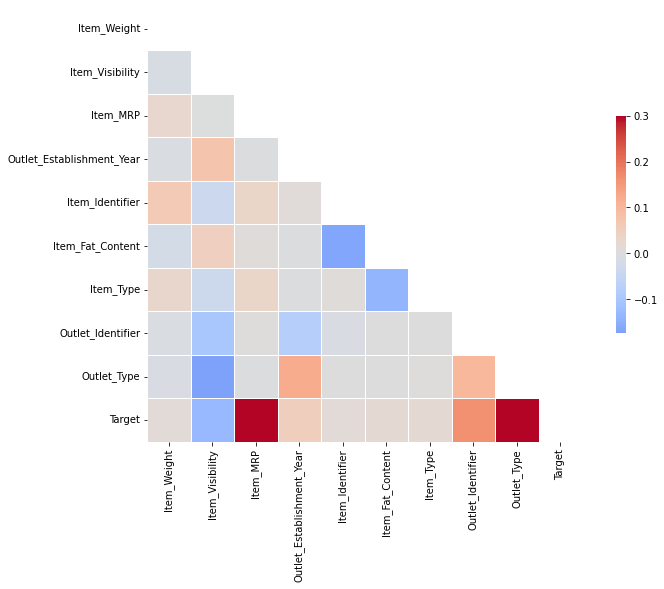

In [138]:
feature_select(X,y)

In [139]:
X.drop(['Item_Identifier'],axis=1 , inplace=True)

2022-07-22 15:05:49.299 | INFO     | __main__:feature_select:18 - Categorical columns: ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type']
2022-07-22 15:05:49.300 | INFO     | __main__:feature_select:19 - Numerical columns: ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
2022-07-22 15:05:49.302 | INFO     | __main__:transform:17 - Transforming data
2022-07-22 15:05:49.302 | INFO     | __main__:transform:18 - Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')


,lasso_selected,Score_mutual_info,Score_RFE
Item_Fat_Content,28.185419,0.031077,3
Outlet_Identifier,202.589234,0.252749,2
Item_Weight,0.000000,0.071249,1
Item_Visibility,-89.371676,0.084327,1
Item_MRP,969.012636,0.763004,1
Outlet_Establishment_Year,32.221059,0.156976,1
Item_Type,-3.820470,0.056800,1
Outlet_Type,647.243772,0.274757,1


,features,VIF Factor
6,Outlet_Identifier,2.919596
7,Outlet_Type,2.782665
5,Item_Type,2.618232
4,Item_Fat_Content,1.427777
3,Outlet_Establishment_Year,1.032098
1,Item_Visibility,1.031755
0,Item_Weight,1.002082
2,Item_MRP,1.001314


True

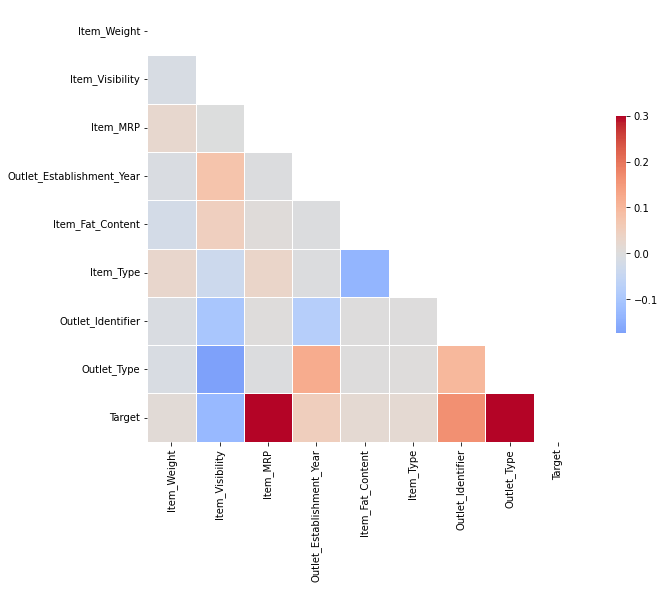

In [140]:
feature_select(X,y)

In [141]:
X.drop(['Outlet_Identifier'],axis=1 , inplace=True)

2022-07-22 15:06:54.873 | INFO     | __main__:feature_select:18 - Categorical columns: ['Item_Fat_Content', 'Item_Type', 'Outlet_Type']
2022-07-22 15:06:54.874 | INFO     | __main__:feature_select:19 - Numerical columns: ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
2022-07-22 15:06:54.876 | INFO     | __main__:transform:17 - Transforming data
2022-07-22 15:06:54.877 | INFO     | __main__:transform:18 - Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')


,lasso_selected,Score_mutual_info,Score_RFE
Item_Fat_Content,28.916531,0.022519,3
Item_Type,-4.060287,0.053503,2
Item_Weight,-1.553123,0.071901,1
Item_Visibility,-105.092779,0.084161,1
Item_MRP,969.658666,0.763203,1
Outlet_Establishment_Year,14.978836,0.156124,1
Outlet_Type,666.843615,0.265972,1


,features,VIF Factor
6,Outlet_Type,2.324423
5,Item_Type,2.163247
4,Item_Fat_Content,1.376404
1,Item_Visibility,1.031614
3,Outlet_Establishment_Year,1.019496
0,Item_Weight,1.001992
2,Item_MRP,1.001235


True

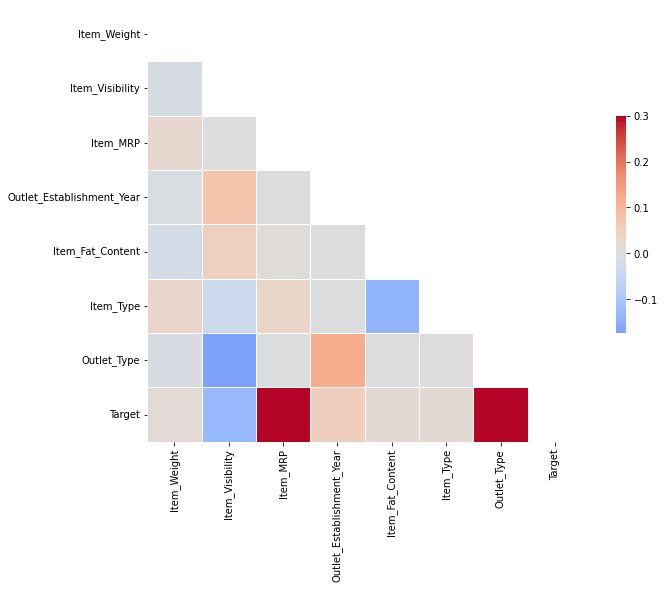

In [142]:
feature_select(X,y)

In [144]:
len(X.columns)

7

In [163]:
from BigmartsalesPrediction.app_util.util import read_yaml_file , write_yaml_file

In [168]:
schema = read_yaml_file("/home/pk/Desktop/MachineLearning/project/BigMart-Sales-Data/config/schema.yaml")

In [169]:
selected_old_columns = schema['selected_columns']

In [152]:
selected_old_columns.remove('Item_Outlet_Sales')

In [170]:
selected_old_columns

['Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Outlet_Type',
 'Item_Outlet_Sales']

In [156]:
selected = X.columns.to_list()

In [157]:
selected_old_columns == selected

False

In [158]:
for col in selected_old_columns:
    print(col) if col not in selected else print("")

Item_Identifier





Outlet_Identifier




In [159]:
schema['selected_columns'] = selected + ['Item_Outlet_Sales']

In [160]:
schema['selected_columns']

['Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Outlet_Type',
 'Item_Outlet_Sales']

In [161]:
numeric_columns = X.select_dtypes(exclude=['object' , 'bool']).columns.to_list()
categorical_features = X.select_dtypes(include=['object' , 'bool']).columns.to_list()

In [162]:
schema['categorical_columns'] = categorical_features
schema['numeric_columns'] = numeric_columns

In [166]:
write_yaml_file(data= schema,file_path= "/home/pk/Desktop/MachineLearning/project/BigMart-Sales-Data/config/schema.yaml")

In [167]:
X.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Type'],
      dtype='object')